# 教師あり学習

* データ （ダウンロード後、指示に従ってアップロードする）CSV形式：[exp_data.csv](https://github.com/HumanomeLab/TMDU_lecture_2019/blob/master/data/exp_data.csv)
  * データ(exp_data.csv)は前回と同じものなので、手元に持っている場合にはダウンロードの必要は無い


# 0. データの準備
## 0.1 ライブラリとデータのインポート

必要なライブラリのインポート。Seabornを利用しないこと以外は、前回同様。

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

データの読み込み。予め前回と同様に、exp_data.csvをアップロードする必要がある。
df_class.shape で、994行（サンプル）、907列（遺伝子）あることを確認する。

In [0]:
df_class = pd.read_csv("exp_data.csv", index_col="Name")
df = df_class.drop("class", axis=1)
print(df_class.shape)
print(df.shape)

(994, 907)
(994, 906)


前回は紹介していない内容で便利なメソッドとしてdescribe()がある。各列の統計値を出すことが出来る。

In [0]:
df.describe()

,AAMP,AARS2,ABCA9,ABCB1,ABCG4,ABI1,ABL1,ABL2,ABRAXAS1,ACKR3,...,ZNF217,ZNF24,ZNF300,ZNF331,ZNF384,ZNF521,ZNF703,ZNF750,ZNF91,ZRSR2
count,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,...,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000
mean,3.394743,2.678533,1.460645,1.526119,0.498881,3.244420,3.265563,2.933774,2.271508,2.951437,...,3.230092,3.196133,1.833106,2.588444,3.086075,2.062870,2.228635,2.445284,2.347372,2.277585
std,0.123715,0.179999,0.421810,0.433981,0.460353,0.150565,0.169559,0.184345,0.212505,0.617959,...,0.205617,0.164322,0.458601,0.295475,0.154303,0.399491,0.492956,0.692941,0.349965,0.195613
min,2.937886,1.752758,-0.096584,-0.334138,-1.000000,2.764830,2.463578,2.196295,1.475671,1.438949,...,1.832261,2.744736,-0.465466,1.348937,2.585842,0.524370,0.756469,-0.072527,0.758306,1.625427
25%,3.309720,2.568492,1.177805,1.247027,0.254274,3.137137,3.175167,2.823876,2.136015,2.463903,...,3.111038,3.086869,1.562930,2.418549,2.990454,1.798927,1.880190,2.118064,2.208064,2.153312
50%,3.392539,2.686466,1.465954,1.523477,0.504410,3.226691,3.272993,2.945235,2.260943,2.874578,...,3.222527,3.191606,1.886605,2.598567,3.080545,2.088839,2.243379,2.582879,2.409819,2.278384
75%,3.476430,2.785962,1.752473,1.811056,0.760043,3.337827,3.377852,3.051225,2.396490,3.440331,...,3.347498,3.290847,2.148996,2.776645,3.180512,2.329832,2.581951,2.936400,2.567327,2.423345
max,3.950669,3.423044,2.624436,3.067718,2.081639,3.813918,3.798831,3.567607,3.162370,4.443498,...,4.314649,4.258328,2.996294,3.890578,3.772474,3.797340,3.958917,3.863004,3.353008,2.810002


collections.Counter で、値の出現回数をカウントする。

In [0]:
import collections
collections.Counter(np.array(df_class["class"]))

Counter({0: 510, 1: 484})

In [0]:
# Xが特徴量、yがクラスであることを明示するため、代入。
X = df.values
y = df_class["class"].values

In [0]:
X

array([[3.28224815, 2.71343006, 1.34909289, ..., 1.19612642, 2.19029527,
        2.17130219],
       [3.35003276, 2.5042166 , 1.62506848, ..., 3.01484383, 2.76762999,
        2.22212835],
       [3.44853937, 2.61471271, 1.32678426, ..., 1.31299565, 2.23910669,
        2.19270402],
       ...,
       [3.49341762, 2.70260198, 1.78584712, ..., 3.39672576, 2.47883766,
        2.36308336],
       [3.30675732, 2.47753219, 1.61026507, ..., 2.75123983, 2.10813187,
        2.14802547],
       [3.32162328, 2.32313448, 0.97939812, ..., 3.22883905, 2.16691831,
        2.1715919 ]])

In [0]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## 0.1 訓練データとテストデータの分割

訓練データを全体の8割、テストデータを全体の2割で分割する。

* X_train, X_test: 訓練データとテストデータの特徴量
* y_train, y_test: 訓練データとテストデータのクラス

ここでは、各手法に注力するため、クロスバリデーション（交差検証）と、各手法におけるパラメータの最適化は、一通り教師あり学習の話をした後に、紹介する。

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [0]:
print(X_train.shape)
print(X_test.shape)
print(collections.Counter(np.array(y_train)))
print(collections.Counter(np.array(y_test)))

(795, 906)
(199, 906)
Counter({0: 404, 1: 391})
Counter({0: 106, 1: 93})


# 1. Decision Tree（決定木）



## 1.1 ハイパーパラメータの指定なし

決定木のパッケージの読み込みと、分類木の構築。

In [0]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

構築した分類木の精度を評価する。

In [0]:
# 訓練データでの精度
y_train_pred = clf.predict(X_train)
print("Training accuracy: ", accuracy_score(y_train, y_train_pred))
# テストデータでの精度
y_test_pred = clf.predict(X_test)
print("Test accuracy: ", accuracy_score(y_test, y_test_pred))

Training accuracy:  1.0
Test accuracy:  0.8894472361809045


ROCカーブを描画し、予測精度を調査する。

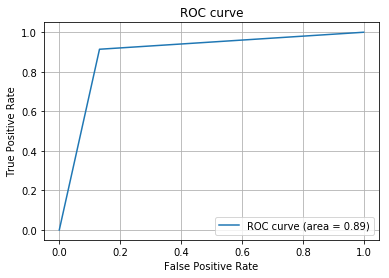

In [0]:
y_test_proba = clf.predict_proba(X_test)

# FPR, TPR(, しきい値) を算出
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_proba[:,1])
auc = metrics.auc(fpr, tpr)

# ROC曲線をプロット
plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

決定木の描画

描画で必要なGraphvizをインストールした後、描画。

In [0]:
!pip install graphviz

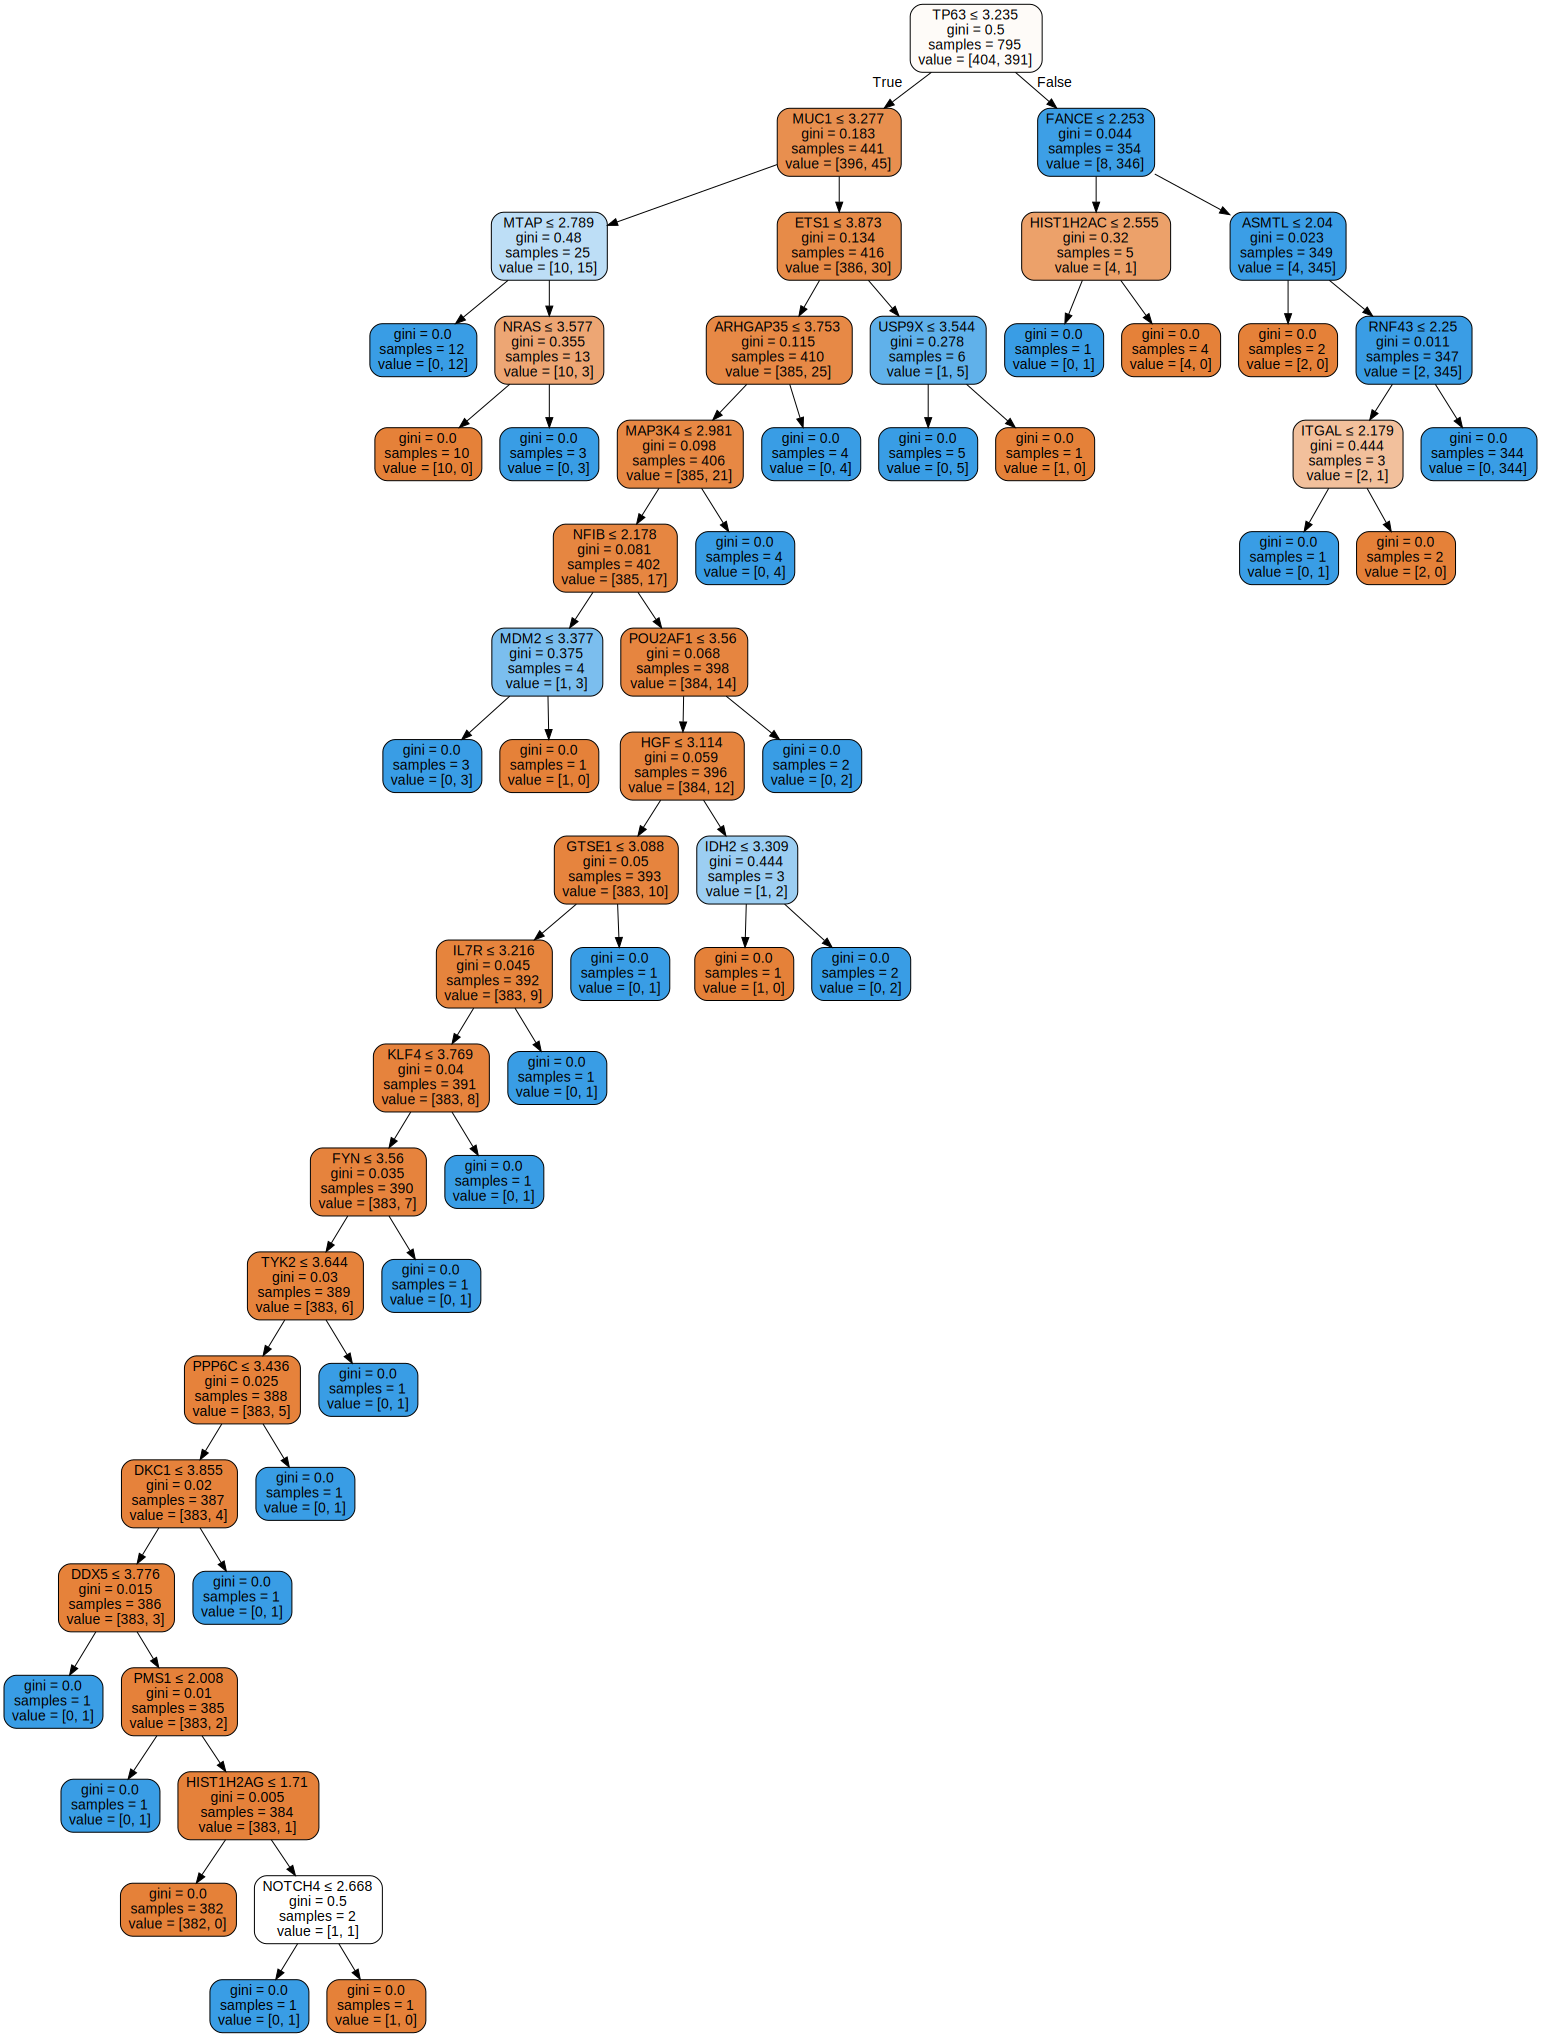

In [0]:
import graphviz
from IPython.display import Image
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=df.columns,
                                filled=True, rounded=True,  
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

## 1.2 木の高さの上限を2に指定

木の大きさが非常に大きくて、何が意味あるかが分かりにくいので、木の高さの上限を2に制限して分類と描画をする。

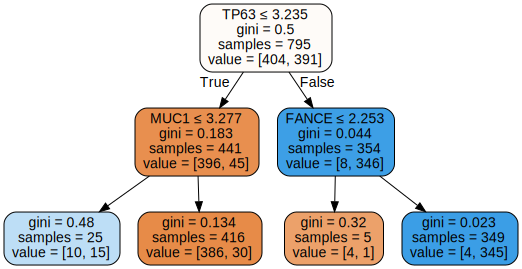

In [0]:
clf = tree.DecisionTreeClassifier(max_depth=2)  # max_depthで木の高さの上限を指定
clf.fit(X_train, y_train)
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=df.columns,
                                filled=True, rounded=True,  
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

構築した決定木の精度評価をする。

In [0]:
# 訓練データでの精度
y_train_pred = clf.predict(X_train)
print("Training accuracy: ", accuracy_score(y_train, y_train_pred))
# テストデータでの精度
y_test_pred = clf.predict(X_test)
print("Test accuracy: ", accuracy_score(y_test, y_test_pred))

Training accuracy:  0.9433962264150944
Test accuracy:  0.8994974874371859


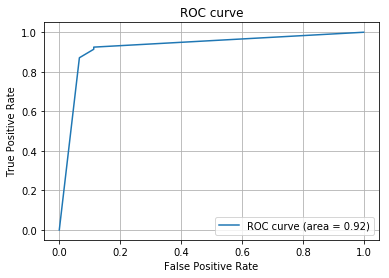

In [0]:
y_test_proba = clf.predict_proba(X_test)

# FPR, TPR(, しきい値) を算出
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_proba[:,1])
auc = metrics.auc(fpr, tpr)

# ROC曲線をプロット
plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

## 1.3 指標の変更

決定木を作るときに、criterionで、決定木の良し悪しをはかる指標を変更できる。

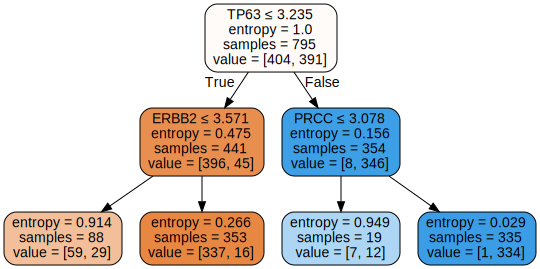

In [0]:
clf = tree.DecisionTreeClassifier(max_depth=2, criterion="entropy")  # criterionでエントロピーを指定
clf.fit(X_train, y_train)
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=df.columns,
                                filled=True, rounded=True,  
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

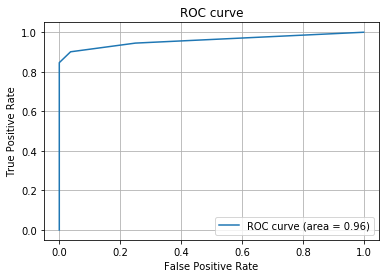

In [0]:
y_test_proba = clf.predict_proba(X_test)

# FPR, TPR(, しきい値) を算出
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_proba[:,1])
auc = metrics.auc(fpr, tpr)

# ROC曲線をプロット
plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

# 2. ランダムフォレスト

パッケージの読み込みと、訓練データを用いてランダムフォレストのモデルを構築する。
n_estimators は、アンサンブル学習する際の木の数。max_depth は作成する木の大きさ。

In [0]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=None)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

予測精度を調べる。

In [0]:
# 訓練データでの精度
y_train_pred = clf.predict(X_train)
print("Training accuracy: ", accuracy_score(y_train, y_train_pred))
# テストデータでの精度
y_test_pred = clf.predict(X_test)
print("Test accuracy: ", accuracy_score(y_test, y_test_pred))

Training accuracy:  0.9836477987421384
Test accuracy:  0.949748743718593


Random Forest で求められた木を基に作成する、特徴量の重要性指標。上位10遺伝子を描画してみる。

clf.feature_importance_ に各特徴量の分類に関する重要性指標値が入っている。

Feature ranking:
1. TP63 (0.064043)
2. MUC1 (0.044996)
3. FANCE (0.036844)
4. CRKL (0.032394)
5. NKX2-1 (0.032073)
6. EPHA10 (0.030686)
7. DUSP9 (0.022940)
8. ERBB3 (0.022256)
9. NTRK2 (0.021927)
10. ACKR3 (0.021919)


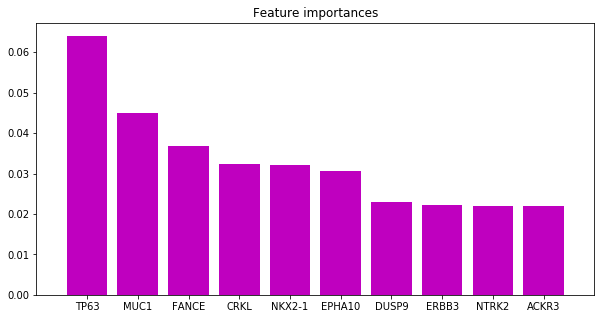

In [0]:
# 重要性指標、値の上位10遺伝子を取り出す。
importances = clf.feature_importances_
N = 10
indices = np.argsort(importances)[::-1][:N]
std = np.std([clf.feature_importances_ for tree in clf.estimators_],
             axis=0)

# 重要性の高い特徴量から表示
print("Feature ranking:")
for f in range(N):
    print("%d. %s (%f)" % (f + 1, df.columns[indices[f]], importances[indices[f]]))

# 上記の数値を、棒グラフとして描画。
plt.figure(figsize=(10,5))
plt.title("Feature importances")
plt.bar(range(N), importances[indices],
       color="m", yerr=std[indices], align="center")
plt.xticks(range(N), [df.columns[indices[f]] for f in range(N)])
plt.xlim([-1, N])
plt.show()

# 3. SVM

SVMのパッケージの読み込みと、SVM(クラス名はSVC (Support vector classification))の実施。
* SVC内のオプションは、scikit-learn のマニュアル ([sklearn.svm.SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)) を参照。SVMでは、C、gamma、kernel が主要なパラメータ。
* probability=Trueは、ROCカーブを書くために出力値の追加のオプション

手順が、KNNとほとんど同じであることに注意。以下のクラス分類手法も、ほぼ同じ手順で学習が可能。

In [0]:
from sklearn.svm import SVC
clf = SVC(C=100, gamma='auto', kernel='rbf', probability=True) #　実行するクラス分類機の設定。ここではSVM
clf.fit(X_train, y_train) # クラス分類の実行、モデルの作成

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

精度の調査 (KNN同様)

In [0]:
# 訓練データでの精度
y_train_pred = clf.predict(X_train)
print("Training accuracy: ", accuracy_score(y_train, y_train_pred))
# テストデータでの精度
y_test_pred = clf.predict(X_test)
print("Test accuracy: ", accuracy_score(y_test, y_test_pred))

Training accuracy:  1.0
Test accuracy:  0.9698492462311558


学習データにおける分類結果の分割表を調べる。

In [0]:
targets = ["Prediction: 0", "1"]
pd.DataFrame(confusion_matrix(y_train, y_train_pred), columns=targets) # Training

,Prediction: 0,1
0,404,0
1,0,391


同様に、テストデータにおける分類結果も調べる。

In [0]:
targets = ["Prediction: 0", "1"]
pd.DataFrame(confusion_matrix(y_test, y_test_pred), columns=targets) # Training

,Prediction: 0,1
0,102,4
1,2,91


ROCカーブで性能を評価する。

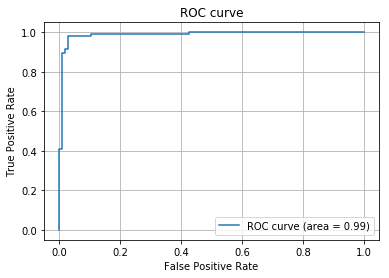

In [0]:
# SVMで出力を確率値にする
y_test_proba = clf.predict_proba(X_test)

# FPR, TPR(, しきい値) を算出
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_proba[:,1])
auc = metrics.auc(fpr, tpr)

# ROC曲線をプロット
plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

# 4. Cross validation (交差検証)

交差検証をKFoldを利用して実施する。
典型例としてSVMに対して行う。

In [0]:
# SVMで Cross Validationを実行する例
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True)  # n_splitsで分割数を指定する。ここでは5-fold cross validationを実施する
accuracies = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    #　実行するクラス分類機の設定。ここではSVM
    clf = SVC(gamma='auto', probability=True) 
    clf.fit(X_train, y_train) # クラス分類の実行、モデルの作成
    # テストデータでの精度
    y_test_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_test_pred)
    accuracies.append(acc)
    print("Accuracy: ", acc)
print("Mean Accuracy: ", np.mean(accuracies))
print("SD: ", np.std(accuracies))

Accuracy:  0.9195979899497487
Accuracy:  0.9547738693467337
Accuracy:  0.9547738693467337
Accuracy:  0.9547738693467337
Accuracy:  0.9494949494949495
Mean Accuracy:  0.9466829094969798
SD:  0.01369592150752296


頻出する手順なので、上記のルーティンをまとめた関数 cross_val_score が提供されている。

In [0]:
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=5, shuffle=True)
clf = SVC(gamma='auto', probability=True) 
cross_val_score(clf, X, y, cv=kf, scoring='precision_macro')

array([0.95182046, 0.96240334, 0.94357957, 0.92506232, 0.95459184])

# 5. ハイパーパラメータのGrid Search

パラメータ（ハイパーパラメータ）の決定には、複数のパラメータによる実験・評価が必要である。ここでは、Grid Searchを用いて、下記のSVMのパラメータのパターンを全て探索する。

* SVMのパラメータ
  * カーネル(kernerl)："linear", "rbf"
  * ペナルティパラメータ C：1, 10

In [0]:
from sklearn.model_selection import GridSearchCV, cross_val_score
kf = KFold(n_splits=5, shuffle=True)
clf = SVC(gamma='auto', probability=True)
# 探索するパラメータを指定する
parameters = {'kernel':('linear', 'rbf'), 'C':[10,100,1000]}
# Grid Searchの実施
grid_clf = GridSearchCV(estimator=clf, cv=kf, param_grid=parameters, n_jobs=-1)
grid_clf.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
       error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'kernel': ('linear', 'rbf'), 'C': [10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

ベストスコアと、そのパラメータを出力する。

In [0]:
print("Best score: ", grid_clf.best_score_)
print("kernel: ", grid_clf.best_estimator_.kernel)
print("C: ", grid_clf.best_estimator_.C)

Best score:  0.9522613065326633
kernel:  rbf
C:  10
